In [ ]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

codepath = '/user_data/mmhender/image_stats_gabor/code/'
sys.path.insert(0,codepath)

from plotting import plot_utils, load_fits
from utils import roi_utils, default_paths, stats_utils, prf_utils

import pandas as pd
import statsmodels.stats.anova
import scipy.stats
import statsmodels.stats.multitest
import copy


In [2]:
default_paths

<module 'utils.default_paths' from '/user_data/mmhender/image_stats_gabor/code/utils/default_paths.py'>

In [6]:
from analyze_fits import analyze_prfs
fitting_type = 'alexnet_all_conv_pca'
analyze_prfs.compute_prf_coverage(subjects, fitting_type=fitting_type, \
                                  ignore_overlapping_voxels=True, image_size=100)

proc S1, V1: 1709 vox
proc S1, V2: 1590 vox
proc S1, V3: 1397 vox
proc S1, hV4: 520 vox
proc S1, V3ab: 344 vox
proc S1, IPS: 1187 vox
proc S1, OPA: 1428 vox
proc S1, PPA: 851 vox
proc S1, RSC: 403 vox
proc S1, OFA: 304 vox
proc S1, FFA: 648 vox
proc S1, EBA: 2438 vox
proc S2, V1: 1261 vox
proc S2, V2: 1093 vox
proc S2, V3: 1146 vox
proc S2, hV4: 414 vox
proc S2, V3ab: 335 vox
proc S2, IPS: 1344 vox
proc S2, OPA: 1236 vox
proc S2, PPA: 841 vox
proc S2, RSC: 713 vox
proc S2, OFA: 344 vox
proc S2, FFA: 686 vox
proc S2, EBA: 2605 vox
proc S3, V1: 1526 vox
proc S3, V2: 1185 vox
proc S3, V3: 1031 vox
proc S3, hV4: 305 vox
proc S3, V3ab: 407 vox
proc S3, IPS: 1123 vox
proc S3, OPA: 1056 vox
proc S3, PPA: 898 vox
proc S3, RSC: 391 vox
proc S3, OFA: 586 vox
proc S3, FFA: 721 vox
proc S3, EBA: 2189 vox
proc S4, V1: 1022 vox
proc S4, V2: 952 vox
proc S4, V3: 855 vox
proc S4, hV4: 327 vox
proc S4, V3ab: 201 vox
proc S4, IPS: 845 vox
proc S4, OPA: 1004 vox
proc S4, PPA: 757 vox
proc S4, RSC: 585 vo

### load the prf coverage maps, computed in analyze_prfs.py

In [7]:
subjects = np.arange(1,9)
n_subjects = len(subjects)

fitting_type = 'alexnet_all_conv_pca'
# fitting_type = 'gabor_solo_ridge_12ori_8sf_fit_pRFs'

roi_def = roi_utils.multi_subject_roi_def(subjects, remove_ret_overlap=True, \
                                          remove_categ_overlap=True)
roi_names =roi_def.roi_names
n_rois = roi_def.n_rois

fn = os.path.join(default_paths.save_fits_path, 'prf_coverage', \
                  'All_pRFs_%s_no_roi_overlap_100pix.npy'%fitting_type)

prf_coverage = np.load(fn, allow_pickle=True).item()
image_size = prf_coverage['all_mean_prfs'].shape[0]

In [8]:
fn

'/user_data/mmhender/image_stats_gabor/model_fits/prf_coverage/All_pRFs_alexnet_all_conv_pca_no_roi_overlap_100pix.npy'

### plot visual field coverage, averaging all subjects

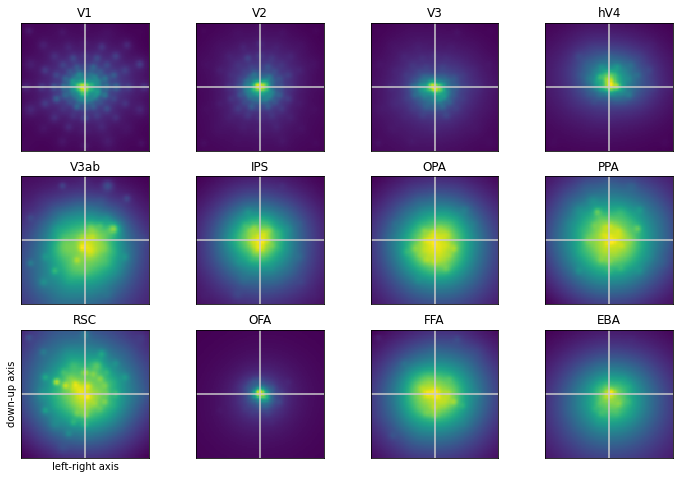

In [9]:
all_comb_prfs = copy.deepcopy(prf_coverage['all_mean_prfs'])
mean_allsubs = np.mean(all_comb_prfs[:,:,:,:], axis=3)

plt.figure(figsize=(12,8));

for rr in range(n_rois):

    plt.subplot(3,4,rr+1)

    plt.pcolormesh(mean_allsubs[:,:,rr])

    plt.axis('square')
    plt.gca().invert_yaxis()
    plt.axvline(image_size/2, color=[0.8, 0.8, 0.8])
    plt.axhline(image_size/2, color=[0.8, 0.8, 0.8])
    plt.xticks([])
    plt.yticks([])
    
    if rr==8:
        plt.xlabel('left-right axis')
        plt.ylabel('down-up axis')

    plt.title('%s'%roi_names[rr])
    

<BarContainer object of 12 artists>

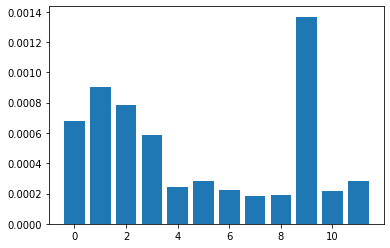

In [10]:
plt.bar(np.arange(n_rois),np.max(np.max(mean_allsubs, axis=0), axis=0))


### same plot but matching color limits (can see big intensity differences here)

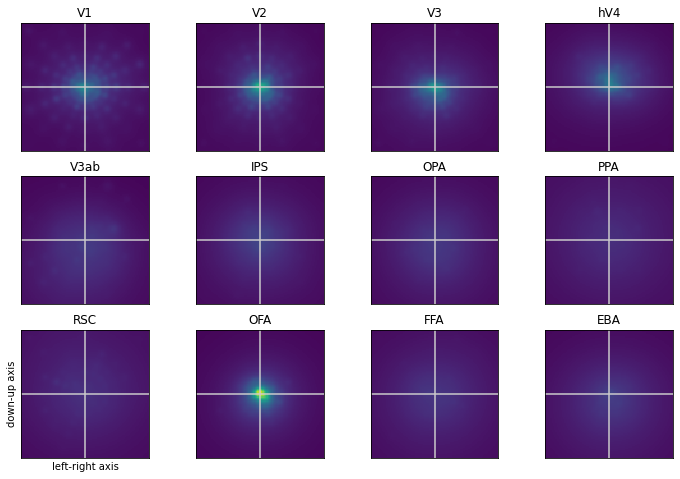

In [11]:
all_comb_prfs = copy.deepcopy(prf_coverage['all_mean_prfs'])
mean_allsubs = np.mean(all_comb_prfs[:,:,:,:], axis=3)
clims = [0,np.max(mean_allsubs)]   

plt.figure(figsize=(12,8));

for rr in range(n_rois):

    plt.subplot(3,4,rr+1)

    plt.pcolormesh(mean_allsubs[:,:,rr],vmin=clims[0], vmax=clims[1])
    
    plt.axis('square')
    plt.gca().invert_yaxis()
    plt.axvline(image_size/2, color=[0.8, 0.8, 0.8])
    plt.axhline(image_size/2, color=[0.8, 0.8, 0.8])
    plt.xticks([])
    plt.yticks([])
    
    if rr==8:
        plt.xlabel('left-right axis')
        plt.ylabel('down-up axis')

    plt.title('%s'%roi_names[rr])
    

### make a plot for one ROI at a time (for saving)

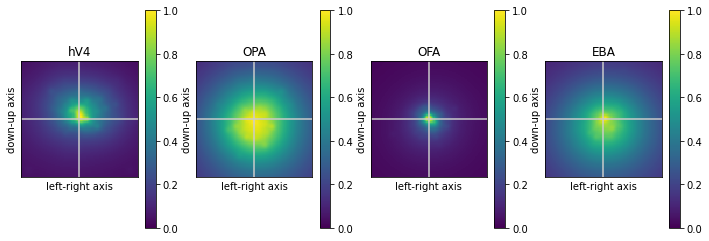

In [14]:
plt.rcParams['pdf.fonttype']=42
rr2plot = [3, 6, 9, 11]
# rr2plot = [3,6,11]

all_comb_prfs = copy.deepcopy(prf_coverage['all_mean_prfs'])
mean_allsubs = np.mean(all_comb_prfs[:,:,:,:], axis=3)

rr = 6
plt.figure(figsize=(12,4))

for ri, rr in enumerate(rr2plot):

    plt.subplot(1,4,ri+1)
    meanvals = mean_allsubs[:,:,rr]/np.max(mean_allsubs[:,:,rr])
    plt.pcolormesh(meanvals, vmin=0, vmax=1)

    plt.axis('square')
    plt.gca().invert_yaxis()
    plt.axvline(image_size/2, color=[0.8, 0.8, 0.8])
    plt.axhline(image_size/2, color=[0.8, 0.8, 0.8])
    plt.xticks([])
    plt.yticks([])
    minval=np.min(mean_allsubs[:,:,rr])
    maxval=np.max(mean_allsubs[:,:,rr])
    plt.colorbar()
    # cbar =plt.colorbar(ticks=np.linspace(minval,maxval,5))
    # cbar.ax.set_yticklabels(['%.1e'%tt for tt in np.linspace(minval,maxval,5)])

    plt.xlabel('left-right axis')
    plt.ylabel('down-up axis')

    plt.title('%s'%roi_names[rr])

fn2save = os.path.join(default_paths.fig_path,'Avg_pRF_coverage_selectedrois.pdf')
plt.savefig(fn2save)

In [13]:
fn2save

'/user_data/mmhender/image_stats_gabor/figures/Avg_pRF_coverage_selectedrois.pdf'

In [88]:
np.linspace(minval,maxval,5)

array([1.62015589e-05, 1.62015589e-05, 1.62015589e-05, 1.62015589e-05,
       1.62015589e-05])

### plot visual field coverage, individual subjects

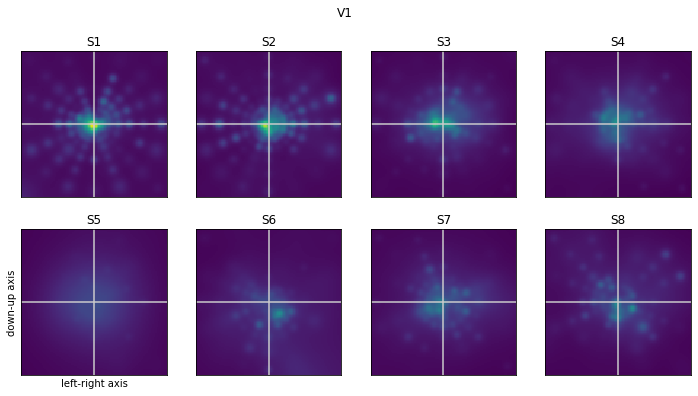

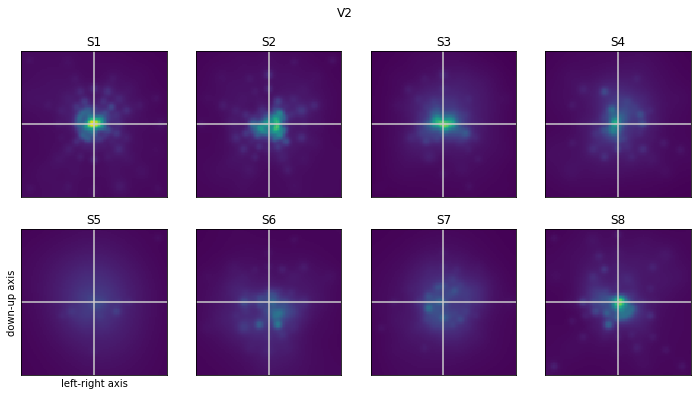

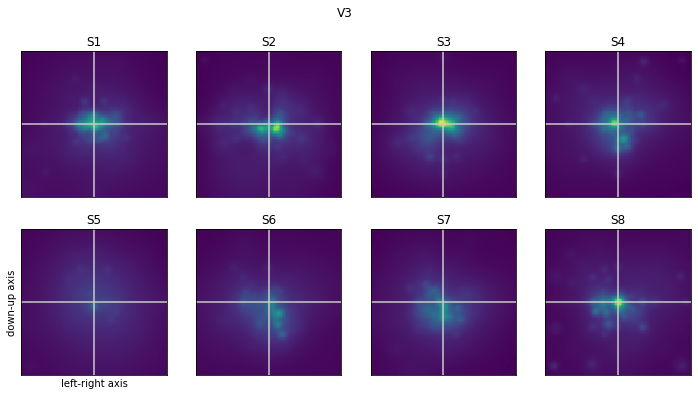

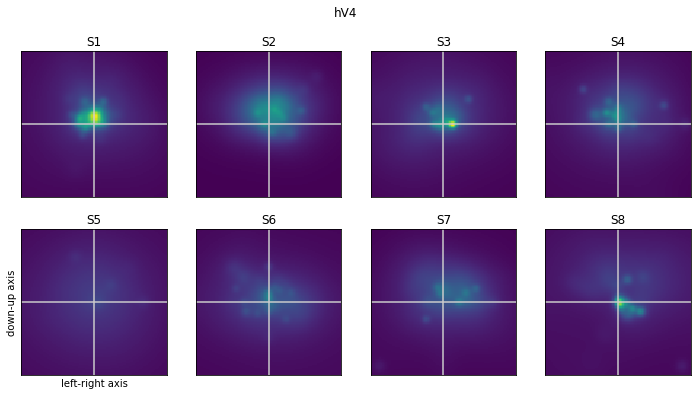

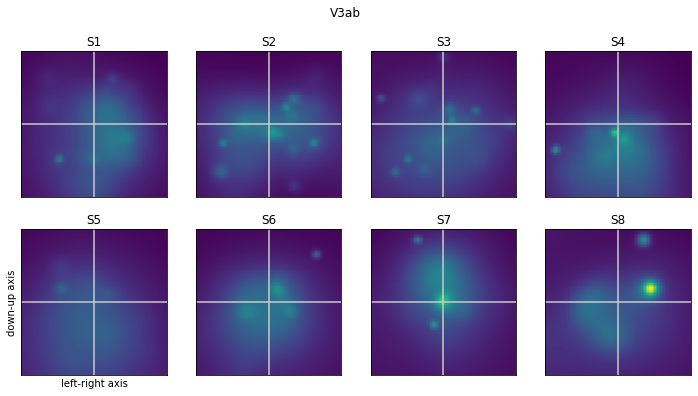

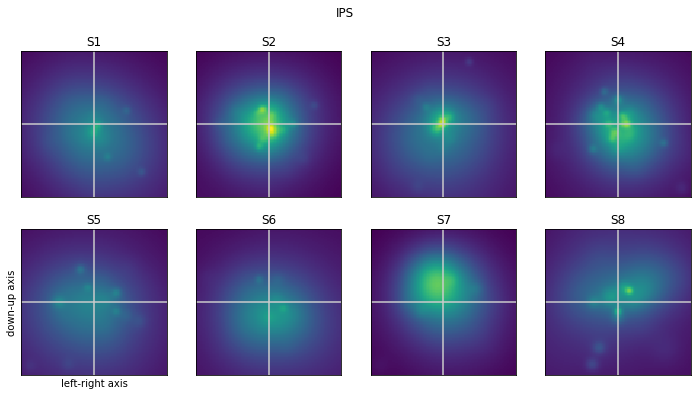

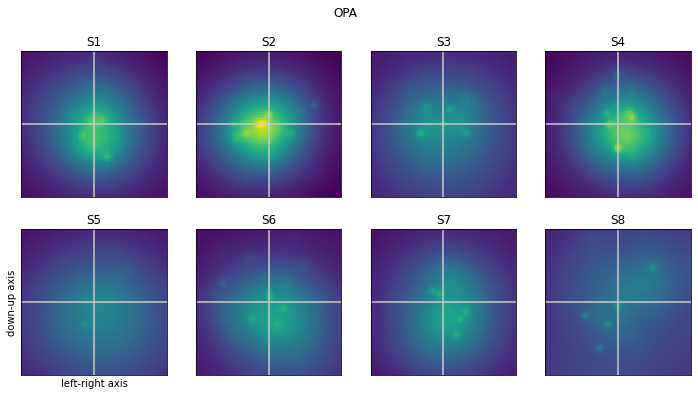

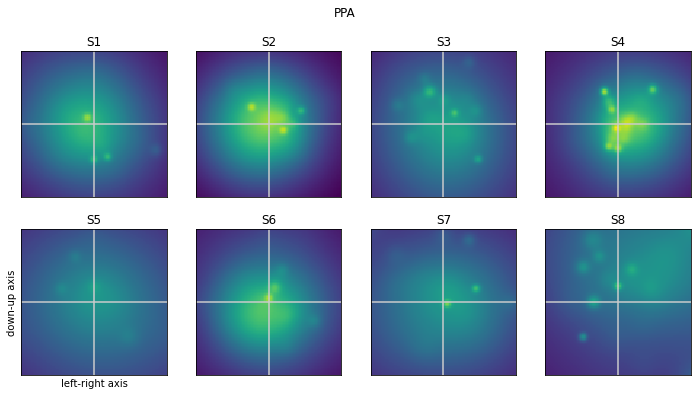

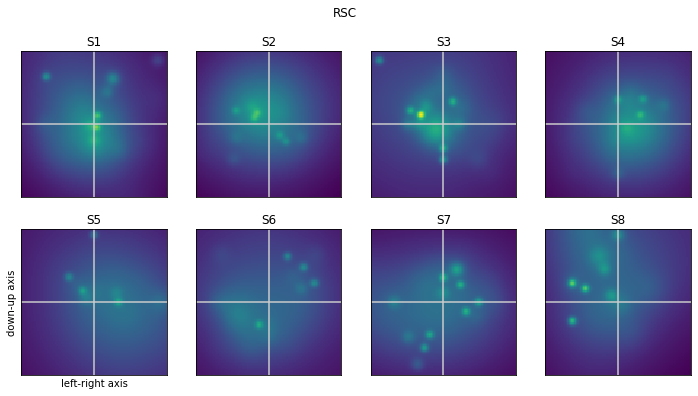

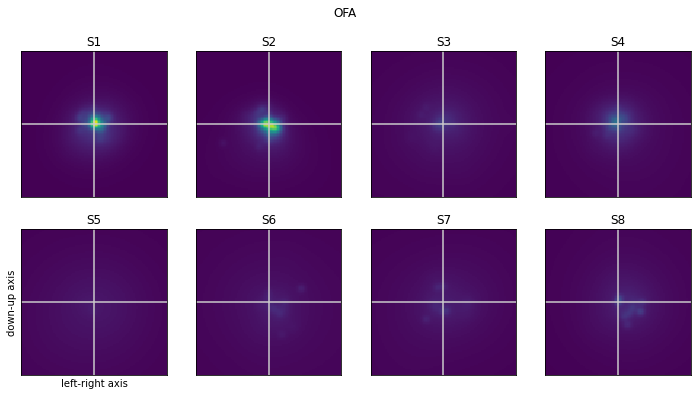

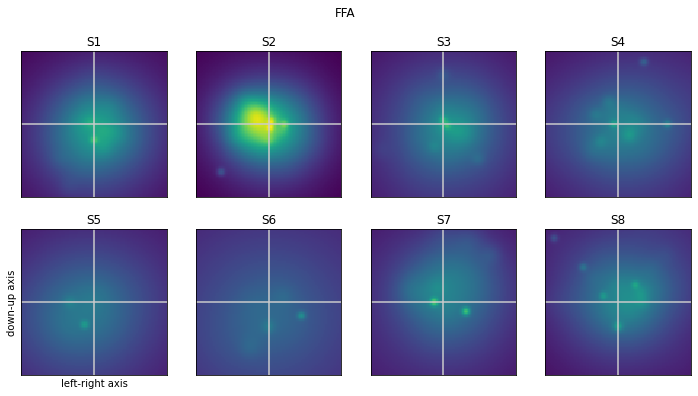

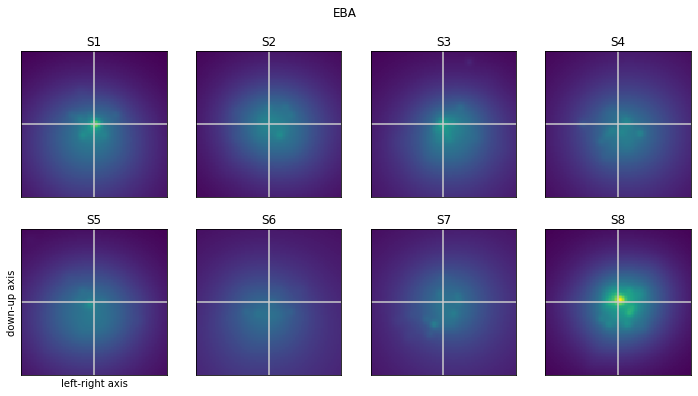

In [31]:
all_comb_prfs = copy.deepcopy(prf_coverage['all_mean_prfs'])
# all_comb_prfs /= np.max(np.max(all_comb_prfs, axis=0), axis=0)

for rr in range(n_rois):
    clims = [np.min(all_comb_prfs[:,:,rr,:]), np.max(all_comb_prfs[:,:,rr,:])]

    plt.figure(figsize=(12,6));

    for si in range(n_subjects):
        plt.subplot(2,4,si+1)

        plt.pcolormesh(all_comb_prfs[:,:,rr,si],vmin=clims[0], vmax=clims[1])
        # plt.colorbar()
        plt.axis('square')
        plt.gca().invert_yaxis()
        plt.axvline(image_size/2, color=[0.8, 0.8, 0.8])
        plt.axhline(image_size/2, color=[0.8, 0.8, 0.8])
        plt.xticks([])
        plt.yticks([])
        plt.title('S%d'%(si+1))
        if si==4:
            plt.xlabel('left-right axis')
            plt.ylabel('down-up axis')
        
    plt.suptitle('%s'%roi_names[rr])

## Now compare the pRF coverage across quadrants of visual field

### 3-way RM anova (ROI x horizontal x vertical)

In [4]:
all_comb_prfs = prf_coverage['all_mean_prfs']
# all_comb_prfs /= np.max(np.max(all_comb_prfs, axis=0), axis=0)

image_size = all_comb_prfs.shape[0]

# compute avg values in each vis field quadrant
center = int(all_comb_prfs.shape[0]/2)
mean_ul = np.mean(np.mean(all_comb_prfs[0:center,0:center,:,:], axis=0), axis=0)
mean_ll = np.mean(np.mean(all_comb_prfs[center:,0:center,:,:], axis=0), axis=0)
mean_ur = np.mean(np.mean(all_comb_prfs[0:center,center:,:,:], axis=0), axis=0)
mean_lr = np.mean(np.mean(all_comb_prfs[center:,center:,:,:], axis=0), axis=0)

mean_each_quad = np.concatenate([mean_ul[:,:,np.newaxis], \
                                 mean_ur[:,:,np.newaxis], \
                                 mean_ll[:,:,np.newaxis], \
                                 mean_lr[:,:,np.newaxis]], axis=2)
quad_names = ['upper left', 'upper right','lower left', 'lower right']

prf_df = pd.DataFrame(data={'subject': np.repeat(np.arange(n_subjects), n_rois*2*2), \
                           'roi': np.tile(np.repeat(np.arange(n_rois), 2*2),[n_subjects,]), \
                           'vert': np.tile(np.repeat(np.arange(2), 2), [n_subjects*n_rois,]), \
                           'horiz': np.tile(np.arange(2), [n_subjects*n_rois*2,])})

prf_values = np.zeros((n_subjects*n_rois*2*2))
for si in range(n_subjects):
    for rr in range(n_rois):
        inds = (prf_df['subject']==si) & (prf_df['roi']==rr)
        prf_values[inds] = mean_each_quad[rr,si,:]
prf_df['prf_values'] = prf_values

model = statsmodels.stats.anova.AnovaRM(data=prf_df, \
                                        depvar='prf_values', \
                                        subject='subject', \
                                        within = ['roi', 'vert', 'horiz'])
rm_result = model.fit()
print(rm_result)

                    Anova
               F Value  Num DF  Den DF Pr > F
---------------------------------------------
roi            -7.0000 11.0000 77.0000 1.0000
vert            3.2937  1.0000  7.0000 0.1124
horiz           3.8876  1.0000  7.0000 0.0893
roi:vert       10.6794 11.0000 77.0000 0.0000
roi:horiz       0.8826 11.0000 77.0000 0.5607
vert:horiz      0.0654  1.0000  7.0000 0.8055
roi:vert:horiz  0.7167 11.0000 77.0000 0.7191



In [5]:
anova_table = pd.DataFrame(rm_result.anova_table)
anova_table.iloc[:,0] = anova_table.iloc[:,0].round(3)
anova_table['Num DF'] = anova_table['Num DF'].astype(int)
anova_table['Den DF'] = anova_table['Den DF'].astype(int)
anova_table['Pr > F'].map('${:,.4f}'.format)
# anova_table['Pr > F'] = anova_table.iloc[:,3].round(4)
anova_table

,F Value,Num DF,Den DF,Pr > F
roi,-7.000,11,77,1.000000e+00
vert,3.294,1,7,1.124139e-01
horiz,3.888,1,7,8.926606e-02
roi:vert,10.679,11,77,1.277322e-11
roi:horiz,0.883,11,77,5.607389e-01
vert:horiz,0.065,1,7,8.055433e-01
roi:vert:horiz,0.717,11,77,7.191257e-01


In [31]:
anova_table.to_csv('/user_data/mmhender/imStat/figures/prf_anova.csv')

### t-tests within ROIs for effect of vertical pos

In [6]:
tstats_vert = np.zeros((n_rois,),dtype=float)
pvals_vert = np.zeros((n_rois,),dtype=float)
pvals_nonpar_vert = np.zeros((n_rois,),dtype=float)
n_subs_samedir = np.zeros((n_rois,),dtype=int)

rndseed = 345351
for rr in range(n_rois):
    
    upper_values = mean_each_quad[rr,:,0:2].ravel()
    lower_values = mean_each_quad[rr,:,2:4].ravel()
    
    stats = scipy.stats.ttest_rel(upper_values, lower_values)
    
    tstats_vert[rr] = stats.statistic
    pvals_vert[rr] = stats.pvalue
    
    p, d = stats_utils.paired_ttest_nonpar(upper_values, lower_values, \
                                           n_iter=10000, rndseed=rndseed)    
    pvals_nonpar_vert[rr] = p
    
    subj_diffs = np.mean(mean_each_quad[rr,:,0:2], axis=1) - np.mean(mean_each_quad[rr,:,2:4], axis=1)
    n_subs_samedir[rr] = np.maximum(np.sum(subj_diffs>0), np.sum(subj_diffs<0))

# p_values = pvals_vert
p_values = pvals_nonpar_vert
orig_shape = p_values.shape
mask_fdr, pvals_fdr = statsmodels.stats.multitest.fdrcorrection(p_values.ravel(), 
                                                                alpha=0.01)
mask_fdr = np.reshape(mask_fdr, orig_shape)
pvals_fdr = np.reshape(pvals_fdr, orig_shape)
   
vertical_df = pd.DataFrame({'t-stat for upper>lower': tstats_vert, \
                           'pvalue_fdr': pvals_fdr, 'sig_fdr': mask_fdr, 'n_subs_indiv': n_subs_samedir}, \
                          index=roi_names)
mask_fdr_vert = mask_fdr
vertical_df.round(3)



,t-stat for upper>lower,pvalue_fdr,sig_fdr,n_subs_indiv
V1,-0.033,0.980,False,5
V2,-0.554,0.661,False,4
V3,-4.534,0.002,True,7
hV4,6.581,0.002,True,8
V3ab,-4.654,0.002,True,7
IPS,-1.296,0.273,False,6
OPA,-5.122,0.002,True,7
PPA,0.602,0.661,False,6
RSC,2.432,0.048,False,5
OFA,-3.494,0.002,True,8


### t-tests for horizontal (no effects here)

In [7]:
tstats_horiz = np.zeros((n_rois,),dtype=float)
pvals_horiz = np.zeros((n_rois,),dtype=float)
pvals_nonpar_horiz = np.zeros((n_rois,),dtype=float)
n_subs_samedir = np.zeros((n_rois,),dtype=int)

rndseed = 456956
for rr in range(n_rois):
    
    left_values = mean_each_quad[rr,:,[0,2]].ravel()
    right_values = mean_each_quad[rr,:,[1,3]].ravel()
    
    stats = scipy.stats.ttest_rel(left_values, right_values)
    
    tstats_vert[rr] = stats.statistic
    pvals_vert[rr] = stats.pvalue
    
    p, d = stats_utils.paired_ttest_nonpar(left_values, right_values, \
                                           n_iter=10000, rndseed=rndseed)    
    pvals_nonpar_horiz[rr] = p
    
    subj_diffs = np.mean(mean_each_quad[rr,:,[0,2]], axis=1) - np.mean(mean_each_quad[rr,:,[1,3]], axis=1)
    n_subs_samedir[rr] = np.maximum(np.sum(subj_diffs>0), np.sum(subj_diffs<0))

# p_values = pvals_horiz
p_values = pvals_nonpar_horiz
orig_shape = p_values.shape
mask_fdr, pvals_fdr = statsmodels.stats.multitest.fdrcorrection(p_values.ravel(), alpha=0.01)
mask_fdr = np.reshape(mask_fdr, orig_shape)
pvals_fdr = np.reshape(pvals_fdr, orig_shape)
   
horiz_df = pd.DataFrame({'t-stat for left>right': tstats_horiz, \
                           'pvalue_fdr': pvals_fdr, 'sig_fdr': mask_fdr, 'n_subs_indiv': n_subs_samedir}, \
                          index=roi_names)
mask_fdr_horiz = mask_fdr
horiz_df.round(3)



,t-stat for left>right,pvalue_fdr,sig_fdr,n_subs_indiv
V1,0.0,0.272,False,2
V2,0.0,0.272,False,2
V3,0.0,0.807,False,2
hV4,0.0,0.272,False,2
V3ab,0.0,0.462,False,1
IPS,0.0,0.807,False,1
OPA,0.0,0.272,False,2
PPA,0.0,0.603,False,2
RSC,0.0,0.781,False,2
OFA,0.0,0.272,False,2


### plot the quadrant values for each ROI

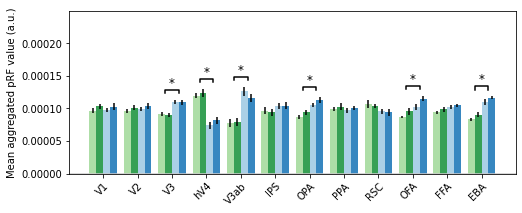

In [9]:
mean_vals = np.mean(mean_each_quad, axis=1)
sem_vals = np.std(mean_each_quad, axis=1)/np.sqrt(n_subjects)

quad_colors = np.concatenate([cm.Greens(np.linspace(0,1,4))[1:3,:], \
                              cm.Blues(np.linspace(0,1,4))[1:3,:]], axis=0)

plt.rcParams['pdf.fonttype']=42
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, \
                                space=0.1, \
                xticklabels=roi_names, ylabel='Mean aggregated pRF value (a.u.)', \
                ylim=[0, 0.000250], title='',\
                legend_labels=quad_names, \
                colors = quad_colors, \
                legend_overlaid=False, legend_separate=False, \
                fig_size=(8,3),
                add_brackets = mask_fdr_vert, 
                bracket_text = ['*' if mask_fdr_vert[ri] else None for ri in range(n_rois) ])
plt.yticks(np.arange(0,0.00021, 0.00005))

fn2save = '/user_data/mmhender/imStat/figures/Quadrant_avg_pRFs.pdf'
plt.savefig(fn2save)

### make a simpler figure (just the upper/lower, averaged)

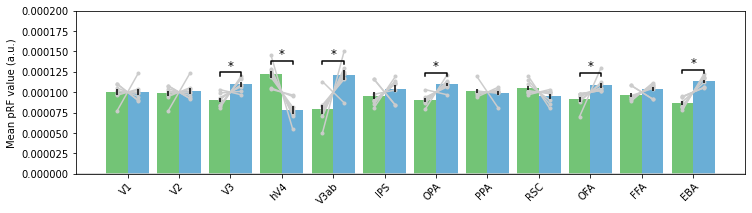

In [9]:
mean_each_region = np.concatenate([np.mean(mean_each_quad[:,:,0:2], axis=2, keepdims=True), \
                                   np.mean(mean_each_quad[:,:,2:4], axis=2, keepdims=True)], axis=2)

mean_vals = np.mean(mean_each_region, axis=1)
sem_vals = np.std(mean_each_region, axis=1)/np.sqrt(n_subjects)

region_colors = np.concatenate([cm.Greens(np.linspace(0,1,3))[1:2,:], \
                              cm.Blues(np.linspace(0,1,3))[1:2,:]], axis=0)
plt.rcParams['pdf.fonttype']=42
region_names = ['upper','lower']
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, \
                                point_data=np.moveaxis(mean_each_region, [0,1,2], [1,0,2]), \
                                add_ss_lines=True, 
                                space=0.08, \
                                space_inner = 0.0,\
                xticklabels=roi_names, ylabel='Mean pRF value (a.u.)', \
                ylim=[0,2e-4], title='',\
                legend_labels=region_names, \
                colors = region_colors, \
                legend_overlaid=False, legend_separate=False, \
                fig_size=(12,3),
                add_brackets = mask_fdr_vert, 
                bracket_text = ['*' if mask_fdr_vert[ri] else None for ri in range(n_rois) ])

fn2save = '/user_data/mmhender/imStat/figures/Upper_lower_avg_pRFs.pdf'
plt.savefig(fn2save)

In [33]:
fh.get_children()[0]

In [29]:
mean_vals.shape

(12, 2)

In [28]:
np.moveaxis(mean_each_region, [0,1,2], [0,2,1]).shape

(12, 2, 8)

## Same quadrant analysis, but using the max aggregation instead of mean aggregation

### compute mean value in each visual field quadrant

In [46]:
all_comb_prfs = prf_coverage['all_max_prfs']
image_size = all_comb_prfs.shape[0]

center = int(all_comb_prfs.shape[0]/2)
mean_ul = np.mean(np.mean(all_comb_prfs[0:center,0:center,:,:], axis=0), axis=0)
mean_ll = np.mean(np.mean(all_comb_prfs[center:,0:center,:,:], axis=0), axis=0)
mean_ur = np.mean(np.mean(all_comb_prfs[0:center,center:,:,:], axis=0), axis=0)
mean_lr = np.mean(np.mean(all_comb_prfs[center:,center:,:,:], axis=0), axis=0)

mean_each_quad = np.concatenate([mean_ul[:,:,np.newaxis], \
                                 mean_ur[:,:,np.newaxis], \
                                 mean_ll[:,:,np.newaxis], \
                                 mean_lr[:,:,np.newaxis]], axis=2)

prf_df = pd.DataFrame(data={'subject': np.repeat(np.arange(n_subjects), n_rois*2*2), \
                           'roi': np.tile(np.repeat(np.arange(n_rois), 2*2),[n_subjects,]), \
                           'vert': np.tile(np.repeat(np.arange(2), 2), [n_subjects*n_rois,]), \
                           'horiz': np.tile(np.arange(2), [n_subjects*n_rois*2,])})

prf_values = np.zeros((n_subjects*n_rois*2*2))
for si in range(n_subjects):
    for rr in range(n_rois):
        inds = (prf_df['subject']==si) & (prf_df['roi']==rr)
        prf_values[inds] = mean_each_quad[rr,si,:]
prf_df['prf_values'] = prf_values

model = statsmodels.stats.anova.AnovaRM(data=prf_df, \
                                        depvar='prf_values', \
                                        subject='subject', \
                                        within = ['roi', 'vert', 'horiz'])
rm_result = model.fit()
print(rm_result)

                    Anova
               F Value  Num DF  Den DF Pr > F
---------------------------------------------
roi            63.6605 11.0000 77.0000 0.0000
vert            0.9684  1.0000  7.0000 0.3579
horiz           0.0000  1.0000  7.0000 0.9992
roi:vert        8.6693 11.0000 77.0000 0.0000
roi:horiz       0.5927 11.0000 77.0000 0.8292
vert:horiz      0.1608  1.0000  7.0000 0.7004
roi:vert:horiz  1.0561 11.0000 77.0000 0.4074



### t-tests within ROIs for effect of vertical pos

we do get some slightly diff values here, compared to mean aggregation method.

In [54]:
tstats_vert = np.zeros((n_rois,),dtype=float)
pvals_vert = np.zeros((n_rois,),dtype=float)
pvals_nonpar_vert = np.zeros((n_rois,),dtype=float)
n_subs_samedir = np.zeros((n_rois,),dtype=int)

rndseed = 345351
for rr in range(n_rois):
    
    upper_values = mean_each_quad[rr,:,0:2].ravel()
    lower_values = mean_each_quad[rr,:,2:4].ravel()
    
    stats = scipy.stats.ttest_rel(upper_values, lower_values)
    
    tstats_vert[rr] = stats.statistic
    pvals_vert[rr] = stats.pvalue
    
    p, d = stats_utils.paired_ttest_nonpar(upper_values, lower_values,\
                                           n_iter=10000, rndseed=rndseed)    
    pvals_nonpar_vert[rr] = p
    
    subj_diffs = np.mean(mean_each_quad[rr,:,0:2], axis=1) - np.mean(mean_each_quad[rr,:,2:4], axis=1)
    n_subs_samedir[rr] = np.maximum(np.sum(subj_diffs>0), np.sum(subj_diffs<0))

# p_values = pvals_vert
p_values = pvals_nonpar_vert
orig_shape = p_values.shape
mask_fdr, pvals_fdr = statsmodels.stats.multitest.fdrcorrection(p_values.ravel(), alpha=0.01)
mask_fdr = np.reshape(mask_fdr, orig_shape)
pvals_fdr = np.reshape(pvals_fdr, orig_shape)
   
vertical_df = pd.DataFrame({'t-stat for upper>lower': tstats_vert, \
                           'pvalue_fdr': pvals_fdr, 'sig_fdr': mask_fdr, 'n_subs_indiv': n_subs_samedir}, \
                          index=roi_names)
mask_fdr_vert = mask_fdr
vertical_df.round(3)



,t-stat for upper>lower,pvalue_fdr,sig_fdr,n_subs_indiv
V1,-0.030,0.977,False,5
V2,-2.226,0.066,False,6
V3,-2.421,0.063,False,6
hV4,6.195,0.004,True,8
V3ab,-1.953,0.086,False,7
IPS,-2.343,0.063,False,7
OPA,-0.505,0.736,False,5
PPA,3.017,0.035,False,7
RSC,2.627,0.055,False,7
OFA,-2.981,0.035,False,6


### t-tests for horizontal (no effects here)

In [55]:
tstats_horiz = np.zeros((n_rois,),dtype=float)
pvals_horiz = np.zeros((n_rois,),dtype=float)
pvals_nonpar_horiz = np.zeros((n_rois,),dtype=float)
n_subs_samedir = np.zeros((n_rois,),dtype=int)

rndseed = 456956
for rr in range(n_rois):
    
    left_values = mean_each_quad[rr,:,[0,2]].ravel()
    right_values = mean_each_quad[rr,:,[1,3]].ravel()
    
    stats = scipy.stats.ttest_rel(left_values, right_values)
    
    tstats_horiz[rr] = stats.statistic
    pvals_horiz[rr] = stats.pvalue
    
    p, d = stats_utils.paired_ttest_nonpar(left_values, right_values, \
                                           n_iter=10000, rndseed=rndseed)    
    pvals_nonpar_horiz[rr] = p
    
    subj_diffs = np.mean(mean_each_quad[rr,:,[0,2]], axis=1) - np.mean(mean_each_quad[rr,:,[1,3]], axis=1)
    n_subs_samedir[rr] = np.maximum(np.sum(subj_diffs>0), np.sum(subj_diffs<0))

# p_values = pvals_horiz
p_values = pvals_nonpar_horiz
orig_shape = p_values.shape
mask_fdr, pvals_fdr = statsmodels.stats.multitest.fdrcorrection(p_values.ravel(), \
                                                                alpha=0.01)
mask_fdr = np.reshape(mask_fdr, orig_shape)
pvals_fdr = np.reshape(pvals_fdr, orig_shape)
   
horiz_df = pd.DataFrame({'t-stat for left>right': tstats_horiz, \
                           'pvalue_fdr': pvals_fdr, \
                         'sig_fdr': mask_fdr, 'n_subs_indiv': n_subs_samedir}, \
                          index=roi_names)
horiz_df.round(3)



,t-stat for left>right,pvalue_fdr,sig_fdr,n_subs_indiv
V1,0.599,0.933,False,1
V2,-1.320,0.933,False,2
V3,1.068,0.933,False,2
hV4,-0.742,0.933,False,2
V3ab,0.077,0.933,False,1
IPS,-0.158,0.933,False,1
OPA,0.579,0.933,False,1
PPA,-1.638,0.933,False,1
RSC,0.101,0.933,False,2
OFA,-0.108,0.933,False,1


In [58]:
statsmodels.stats.multitest.fdrcorrection(p_values.ravel(), \
                                                                alpha=0.01)

(array([False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326,
        0.9326, 0.9326, 0.9326, 0.9326]))

In [56]:
pvals_fdr

array([0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326,
       0.9326, 0.9326, 0.9326, 0.9326])

In [53]:
p_values

array([0.5556, 0.2166, 0.3002, 0.4976, 0.9326, 0.903 , 0.5738, 0.1166,
       0.92  , 0.9262, 0.8642, 0.402 ])

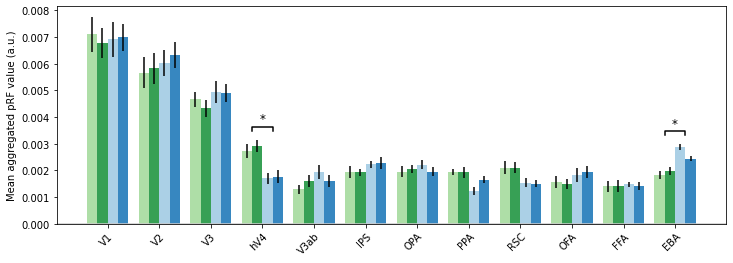

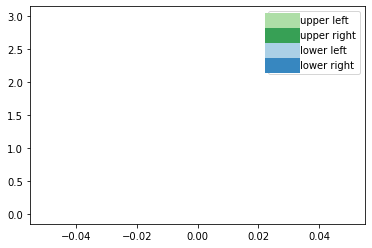

In [49]:
mean_vals = np.mean(mean_each_quad, axis=1)
sem_vals = np.std(mean_each_quad, axis=1)/np.sqrt(n_subjects)

quad_colors = np.concatenate([cm.Greens(np.linspace(0,1,4))[1:3,:], \
                              cm.Blues(np.linspace(0,1,4))[1:3,:]], axis=0)

fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, \
                                space=0.1, \
                xticklabels=roi_names, ylabel='Mean aggregated pRF value (a.u.)', \
                ylim=[], title='',\
                legend_labels=quad_names, \
                colors = quad_colors, \
                legend_overlaid=False, legend_separate=True, \
                fig_size=(12,4),
                add_brackets = mask_fdr_vert, 
                bracket_text = ['*' if mask_fdr_vert[ri] else None for ri in range(n_rois) ])


In [154]:
mean_each_quad.shape

(12, 8, 4)

In [38]:
prf_models

NameError: name 'prf_models' is not defined

## Compare values in central/peripheral visual field

### make a mask for central/peripheral regions

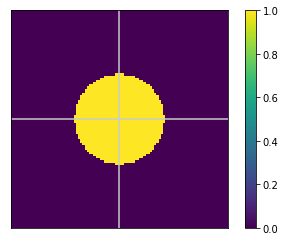

In [18]:
from model_fitting import initialize_fitting
models = initialize_fitting.get_prf_models(5)
eccen_fwrf = np.sqrt(models[:,0]**2+models[:,1]**2)*8.4
                               
eccen_values = np.unique(eccen_fwrf.round(3))
eccen_cutoff = np.mean(eccen_values[4:6])
eccen_cutoff

xgrid, ygrid = np.meshgrid(np.linspace(-0.5, 0.5, image_size), np.linspace(-0.5, 0.5, image_size))
radius_grid = np.sqrt((xgrid**2)+(ygrid**2))

mask = np.zeros((image_size, image_size),dtype=int)
mask[radius_grid<eccen_cutoff/8.4] += 1
mask_region_names = ['peripheral', 'central']

plt.figure();
plt.pcolormesh(mask)
plt.axis('square')
plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.axvline(image_size/2, color=[0.8, 0.8, 0.8])
plt.axhline(image_size/2, color=[0.8, 0.8, 0.8])

### compute mean value in each region, and run 2-way anova

In [19]:
plt.rcParams['pdf.fonttype']=42

all_comb_prfs = prf_coverage['all_mean_prfs']
image_size = all_comb_prfs.shape[0]

n_regions = len(np.unique(mask))
mean_each_region = np.zeros((n_rois, n_subjects,n_regions))
for si in range(n_subjects):
    for rr in range(n_rois):
        for aa in range(n_regions):

            prf_vals = all_comb_prfs[:,:,rr,si]
            mean_each_region[rr,si,aa] = np.mean(prf_vals[mask==aa])
    

# 2-way RM anova (ROI x ecc)

prf_df = pd.DataFrame(data={'subject': np.repeat(np.arange(n_subjects), n_rois*2), \
                           'roi': np.tile(np.repeat(np.arange(n_rois), 2),[n_subjects,]), \
                           'ecc': np.tile(np.arange(2), [n_subjects*n_rois,]),})

prf_values = np.zeros((n_subjects*n_rois*2))
for si in range(n_subjects):
    for rr in range(n_rois):
        inds = (prf_df['subject']==si) & (prf_df['roi']==rr)
        prf_values[inds] = mean_each_region[rr,si,:]
prf_df['prf_values'] = prf_values

model = statsmodels.stats.anova.AnovaRM(data=prf_df, \
                                        depvar='prf_values', \
                                        subject='subject', \
                                        within = ['roi', 'ecc'])
rm_result = model.fit()
print(rm_result)

                 Anova
        F Value   Num DF  Den DF Pr > F
---------------------------------------
roi      13.5334 11.0000 77.0000 0.0000
ecc     296.4164  1.0000  7.0000 0.0000
roi:ecc  13.5334 11.0000 77.0000 0.0000



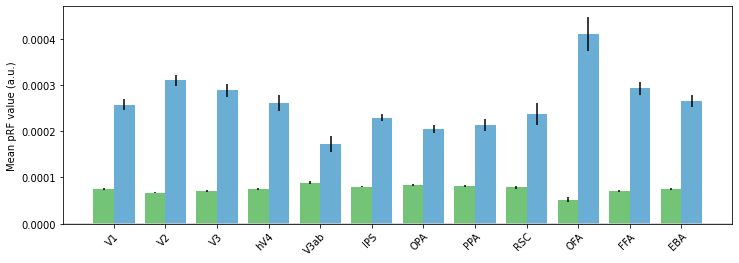

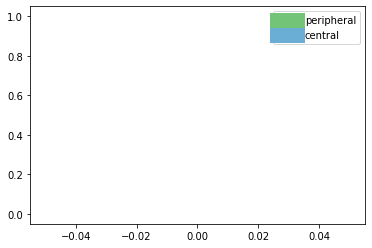

In [20]:
mean_vals = np.mean(mean_each_region, axis=1)
sem_vals = np.std(mean_each_region, axis=1)/np.sqrt(n_subjects)

region_colors = np.concatenate([cm.Greens(np.linspace(0,1,3))[1:2,:], \
                              cm.Blues(np.linspace(0,1,3))[1:2,:]], axis=0)

fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, \
                                space=0.1, \
                xticklabels=roi_names, ylabel='Mean pRF value (a.u.)', \
                ylim=[], title='',\
                legend_labels=mask_region_names, \
                colors = region_colors, \
                legend_overlaid=False, legend_separate=True, \
                fig_size=(12,4))
                # add_brackets = mask_fdr, 
                # bracket_text = ['*' if mask_fdr[ri] else None for ri in range(n_rois) ])

fn2save = '/user_data/mmhender/imStat/figures/Central_periph_avg_pRFs.pdf'
plt.savefig(fn2save)

In [21]:
# same thing, but with max aggregation

plt.rcParams['pdf.fonttype']=42

all_comb_prfs = prf_coverage['all_max_prfs']
image_size = all_comb_prfs.shape[0]

n_regions = len(np.unique(mask))
mean_each_region = np.zeros((n_rois, n_subjects,n_regions))
for si in range(n_subjects):
    for rr in range(n_rois):
        for aa in range(n_regions):

            prf_vals = all_comb_prfs[:,:,rr,si]
            mean_each_region[rr,si,aa] = np.mean(prf_vals[mask==aa])
    

# 2-way RM anova (ROI x ecc)

prf_df = pd.DataFrame(data={'subject': np.repeat(np.arange(n_subjects), n_rois*2), \
                           'roi': np.tile(np.repeat(np.arange(n_rois), 2),[n_subjects,]), \
                           'ecc': np.tile(np.arange(2), [n_subjects*n_rois,]),})

prf_values = np.zeros((n_subjects*n_rois*2))
for si in range(n_subjects):
    for rr in range(n_rois):
        inds = (prf_df['subject']==si) & (prf_df['roi']==rr)
        prf_values[inds] = mean_each_region[rr,si,:]
prf_df['prf_values'] = prf_values

model = statsmodels.stats.anova.AnovaRM(data=prf_df, \
                                        depvar='prf_values', \
                                        subject='subject', \
                                        within = ['roi', 'ecc'])
rm_result = model.fit()
print(rm_result)

                 Anova
        F Value   Num DF  Den DF Pr > F
---------------------------------------
roi      54.9857 11.0000 77.0000 0.0000
ecc     104.6160  1.0000  7.0000 0.0000
roi:ecc  29.0217 11.0000 77.0000 0.0000



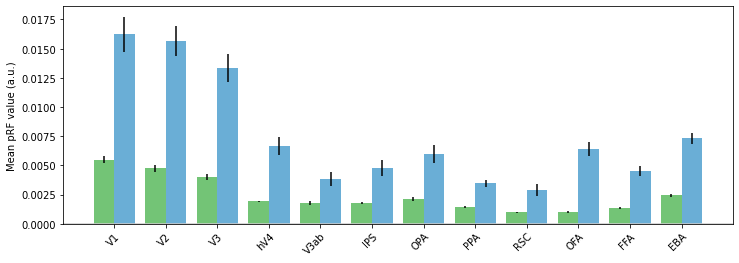

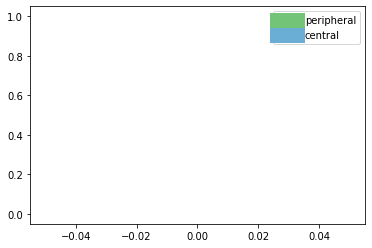

In [22]:
mean_vals = np.mean(mean_each_region, axis=1)
sem_vals = np.std(mean_each_region, axis=1)/np.sqrt(n_subjects)

region_colors = np.concatenate([cm.Greens(np.linspace(0,1,3))[1:2,:], \
                              cm.Blues(np.linspace(0,1,3))[1:2,:]], axis=0)

fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, \
                                space=0.1, \
                xticklabels=roi_names, ylabel='Mean pRF value (a.u.)', \
                ylim=[], title='',\
                legend_labels=mask_region_names, \
                colors = region_colors, \
                legend_overlaid=False, legend_separate=True, \
                fig_size=(12,4))
                # add_brackets = mask_fdr, 
                # bracket_text = ['*' if mask_fdr[ri] else None for ri in range(n_rois) ])

fn2save = '/user_data/mmhender/imStat/figures/Central_periph_avg_pRFs.pdf'
plt.savefig(fn2save)

### Below are more analyses that i tried related to this... 

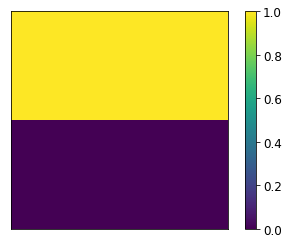

In [27]:
xgrid, ygrid = np.meshgrid(np.linspace(-0.5, 0.5, image_size), np.linspace(-0.5, 0.5, image_size))
mask = np.zeros((image_size, image_size),dtype=int)
mask[ygrid<0] += 1
mask_region_names = ['lower', 'upper']

plt.figure();
plt.pcolormesh(mask)
plt.axis('square')
plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])
plt.colorbar()


In [28]:
# compute mean value in each visual field quadrant

plt.rcParams['pdf.fonttype']=42

all_comb_prfs = prf_coverage['all_mean_prfs']
image_size = all_comb_prfs.shape[0]

n_regions = len(np.unique(mask))
mean_each_region = np.zeros((n_rois, n_subjects,n_regions))
for si in range(n_subjects):
    for rr in range(n_rois):
        for aa in range(n_regions):

            prf_vals = all_comb_prfs[:,:,rr,si]
            mean_each_region[rr,si,aa] = np.mean(prf_vals[mask==aa])
    

# 2-way RM anova (ROI x ecc)

prf_df = pd.DataFrame(data={'subject': np.repeat(np.arange(n_subjects), n_rois*2), \
                           'roi': np.tile(np.repeat(np.arange(n_rois), 2),[n_subjects,]), \
                           'vert': np.tile(np.arange(2), [n_subjects*n_rois,]),})

prf_values = np.zeros((n_subjects*n_rois*2))
for si in range(n_subjects):
    for rr in range(n_rois):
        inds = (prf_df['subject']==si) & (prf_df['roi']==rr)
        prf_values[inds] = mean_each_region[rr,si,:]
prf_df['prf_values'] = prf_values

model = statsmodels.stats.anova.AnovaRM(data=prf_df, \
                                        depvar='prf_values', \
                                        subject='subject', \
                                        within = ['roi', 'vert'])
rm_result = model.fit()
print(rm_result)

                 Anova
         F Value  Num DF  Den DF Pr > F
---------------------------------------
roi       7.0000 11.0000 77.0000 0.0000
vert      3.2886  1.0000  7.0000 0.1126
roi:vert 10.6759 11.0000 77.0000 0.0000



In [144]:
# t-tests within ROIs for effect of vertical pos

all_comb_prfs = prf_coverage['all_mean_prfs']
image_size = all_comb_prfs.shape[0]
center = int(all_comb_prfs.shape[0]/2)
mean_ul = np.mean(np.mean(all_comb_prfs[0:center,0:center,:,:], axis=0), axis=0)
mean_ll = np.mean(np.mean(all_comb_prfs[center:,0:center,:,:], axis=0), axis=0)
mean_ur = np.mean(np.mean(all_comb_prfs[0:center,center:,:,:], axis=0), axis=0)
mean_lr = np.mean(np.mean(all_comb_prfs[center:,center:,:,:], axis=0), axis=0)

mean_each_quad = np.concatenate([mean_ul[:,:,np.newaxis], \
                                 mean_ur[:,:,np.newaxis], \
                                 mean_ll[:,:,np.newaxis], \
                                 mean_lr[:,:,np.newaxis]], axis=2)


tstats_vert = np.zeros((n_rois,),dtype=float)
pvals_vert = np.zeros((n_rois,),dtype=float)

for rr in range(n_rois):
    
    upper_values = mean_each_quad[rr,:,0:2].ravel()
    lower_values = mean_each_quad[rr,:,2:4].ravel()
    stats = scipy.stats.ttest_rel(upper_values, lower_values)
    
    tstats_vert[rr] = stats.statistic
    pvals_vert[rr] = stats.pvalue
    

p_values = pvals_vert
orig_shape = p_values.shape
mask_fdr, pvals_fdr = statsmodels.stats.multitest.fdrcorrection(p_values.ravel(), alpha=0.01)
mask_fdr = np.reshape(mask_fdr, orig_shape)
pvals_fdr = np.reshape(pvals_fdr, orig_shape)
   
vertical_df = pd.DataFrame({'t-stat for upper>lower': tstats_vert, \
                           'pvalue_fdr': pvals_fdr, 'sig_fdr': mask_fdr}, \
                          index=roi_names)
vertical_df.round(3)

,t-stat for upper>lower,pvalue_fdr,sig_fdr
V1,-0.033,0.974,False
V2,-0.557,0.639,False
V3,-4.699,0.001,True
hV4,5.576,0.000,True
V3ab,-4.808,0.001,True
IPS,-0.778,0.598,False
OPA,-5.122,0.001,True
PPA,0.598,0.639,False
RSC,2.431,0.048,False
OFA,-3.497,0.006,True


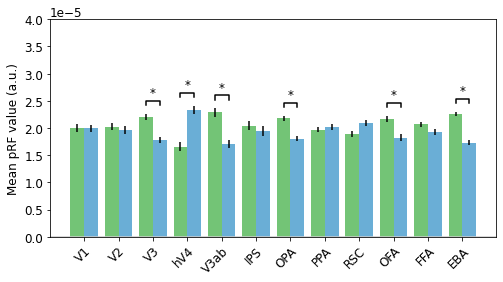

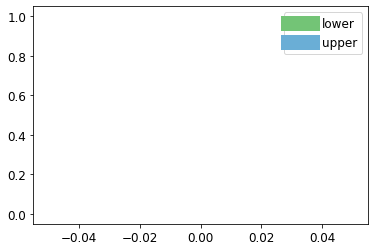

In [152]:
mean_vals = np.mean(mean_each_region, axis=1)
sem_vals = np.std(mean_each_region, axis=1)/np.sqrt(n_subjects)

region_colors = np.concatenate([cm.Greens(np.linspace(0,1,3))[1:2,:], \
                              cm.Blues(np.linspace(0,1,3))[1:2,:]], axis=0)

fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, \
                                space=0.1, \
                xticklabels=roi_names, ylabel='Mean pRF value (a.u.)', \
                ylim=[0, 4e-5], title='',\
                legend_labels=mask_region_names, \
                colors = region_colors, \
                legend_overlaid=False, legend_separate=True, \
                fig_size=(8,4), \
                add_brackets = mask_fdr, \
                bracket_text = ['*' if mask_fdr[ri] else None for ri in range(n_rois) ])

fn2save = '/user_data/mmhender/imStat/figures/Quadrant_avg_pRFs.pdf'
plt.savefig(fn2save)

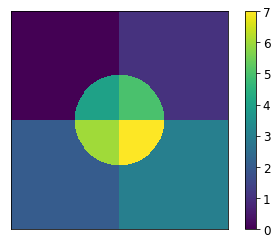

In [127]:
eccen_values = np.unique(eccen_fwrf.round(3))
eccen_cutoff = np.mean(eccen_values[4:6])
eccen_cutoff

xgrid, ygrid = np.meshgrid(np.linspace(-0.5, 0.5, image_size), np.linspace(-0.5, 0.5, image_size))
radius_grid = np.sqrt((xgrid**2)+(ygrid**2))

mask = np.zeros((image_size, image_size),dtype=int)
mask[0:center,0:center] = 0
mask[0:center,center:] = 1
mask[center:,0:center] = 2
mask[center:,center:] = 3
mask[radius_grid<eccen_cutoff/8.4] += 4
mask_region_names = ['peripheral upper left', 'peripheral upper right',\
                     'peripheral lower left', 'peripheral lower right', \
                     'central upper left', 'central upper right',\
                     'central lower left', 'central lower right']

plt.figure();
plt.pcolormesh(mask)
plt.axis('square')
plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])
plt.colorbar()


In [129]:
# 4-way RM anova (ROI x horizontal x vertical x ecc)

all_comb_prfs = prf_coverage['all_mean_prfs']
image_size = all_comb_prfs.shape[0]

n_regions = len(np.unique(mask))
mean_each_region = np.zeros((n_rois, n_subjects,n_regions))
for si in range(n_subjects):
    for rr in range(n_rois):
        for aa in range(n_regions):

            prf_vals = all_comb_prfs[:,:,rr,si]
            mean_each_region[rr,si,aa] = np.mean(prf_vals[mask==aa])
    
    
prf_df = pd.DataFrame(data={'subject': np.repeat(np.arange(n_subjects), n_rois*2*2*2), \
                           'roi': np.tile(np.repeat(np.arange(n_rois), 2*2*2),[n_subjects,]), \
                           'ecc': np.tile(np.repeat(np.arange(2), 2*2), [n_subjects*n_rois,]), \
                           'vert': np.tile(np.repeat(np.arange(2),2), [n_subjects*n_rois*2,]), \
                           'horiz': np.tile(np.arange(2), [n_subjects*n_rois*2*2,])})

prf_values = np.zeros((n_subjects*n_rois*2*2*2))
for si in range(n_subjects):
    for rr in range(n_rois):
        inds = (prf_df['subject']==si) & (prf_df['roi']==rr)
        prf_values[inds] = mean_each_region[rr,si,:]
prf_df['prf_values'] = prf_values

model = statsmodels.stats.anova.AnovaRM(data=prf_df, \
                                        depvar='prf_values', \
                                        subject='subject', \
                                        within = ['roi', 'vert', 'horiz', 'ecc'])
rm_result = model.fit()
print(rm_result)

                      Anova
                   F Value   Num DF  Den DF Pr > F
--------------------------------------------------
roi                 17.6594 11.0000 77.0000 0.0000
vert                 3.3245  1.0000  7.0000 0.1110
horiz                7.5083  1.0000  7.0000 0.0289
ecc                118.9290  1.0000  7.0000 0.0000
roi:vert             6.8652 11.0000 77.0000 0.0000
roi:horiz            0.8574 11.0000 77.0000 0.5846
vert:horiz           3.1723  1.0000  7.0000 0.1181
roi:ecc             17.6594 11.0000 77.0000 0.0000
vert:ecc             0.2721  1.0000  7.0000 0.6180
horiz:ecc            2.9484  1.0000  7.0000 0.1297
roi:vert:horiz       1.1688 11.0000 77.0000 0.3226
roi:vert:ecc         5.1870 11.0000 77.0000 0.0000
roi:horiz:ecc        1.2933 11.0000 77.0000 0.2445
vert:horiz:ecc       3.9099  1.0000  7.0000 0.0885
roi:vert:horiz:ecc   1.6868 11.0000 77.0000 0.0922



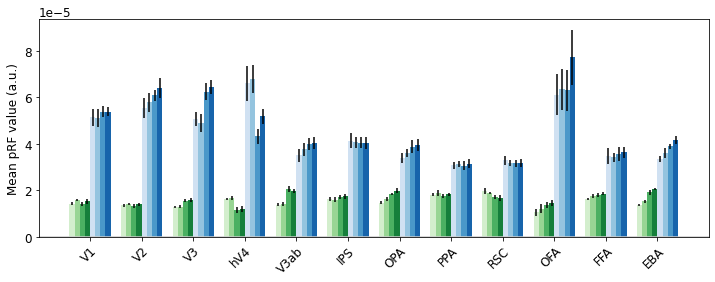

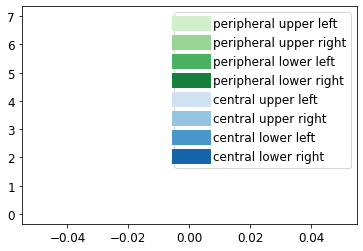

In [130]:
mean_vals = np.mean(mean_each_region, axis=1)
sem_vals = np.std(mean_each_region, axis=1)/np.sqrt(n_subjects)

region_colors = np.concatenate([cm.Greens(np.linspace(0,1,6))[1:5,:], \
                              cm.Blues(np.linspace(0,1,6))[1:5,:]], axis=0)

# mean_vals = mean_vals[:,[0,2]]
# sem_vals = sem_vals[:,[0,2]]
# quad_colors = quad_colors[[0,2],:]

fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, \
                                space=0.1, \
                xticklabels=roi_names, ylabel='Mean pRF value (a.u.)', \
                ylim=[], title='',\
                legend_labels=mask_region_names, \
                colors = region_colors, \
                legend_overlaid=False, legend_separate=True, \
                fig_size=(12,4))
                # add_brackets = mask_fdr, 
                # bracket_text = ['*' if mask_fdr[ri] else None for ri in range(n_rois) ])

# fn2save = '/user_data/mmhender/imStat/figures/Quadrant_avg_pRFs.pdf'
# plt.savefig(fn2save)

In [23]:
# another way of doing stats...compare the mean of each parameter against zero.
# not sure this is as good as the mean pRF coverage above

rndseed = 129324
np.random.seed(rndseed)

tvals = np.zeros((2, n_rois), dtype=float)
pvals = np.zeros((2, n_rois), dtype=float)

n_iter = 1000
tvals_rand = np.zeros((2, n_rois, n_iter), dtype=float)

parslist = [x*screen_eccen_deg, y*screen_eccen_deg]
parnames = ['horizontal-pos', 'vertical-pos']

for pp, pars in enumerate(parslist):
    
    for rr in range(n_rois):
        
        # gather all voxels from this ROI, all subjects
    
        inds_this_roi = roi_def.get_indices(rr) & abv_thresh 
        dist = pars[inds_this_roi]
        stats = scipy.stats.ttest_1samp(dist, 0)

        # real test statistic for this ROI, all subjects
        tvals[pp,rr] = stats.statistic
        pvals[pp,rr] = stats.pvalue
        
        subjinds = subject_inds[inds_this_roi]

        for ii in range(n_iter):
            
            dist_rand = copy.deepcopy(dist)
            
            # shuffle within subject
            for si in range(n_subjects):
                
                inds = subjinds==si
                dist_rand_subj = dist_rand[inds]
                
                # randomly flip signs of the values
                which_negate = np.random.normal(0,1,np.sum(inds))>0
                
                dist_rand_subj[which_negate] *= (-1)
                
                dist_rand[inds] = dist_rand_subj

            stats = scipy.stats.ttest_1samp(dist_rand, 0)

            tvals_rand[pp,rr,ii] = stats.statistic
            
pvals_perm = np.minimum(np.mean(tvals[:,:,np.newaxis]>=tvals_rand, axis=2), \
                        np.mean(tvals[:,:,np.newaxis]<=tvals_rand, axis=2))*2

In [25]:
pvals_perm<0.001

array([[False, False, False, False, False, False,  True,  True, False,
        False,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True]])

In [26]:
import scipy.stats
import copy

rndseed = 129324
np.random.seed(rndseed)

tvals = np.zeros((2, n_rois, n_subjects), dtype=float)
pvals = np.zeros((2, n_rois, n_subjects), dtype=float)

n_iter = 1000
tvals_rand = np.zeros((2, n_rois, n_subjects, n_iter), dtype=float)

parslist = [x*screen_eccen_deg, y*screen_eccen_deg]
parnames = ['horizontal-pos', 'vertical-pos']

In [20]:
for pp, pars in enumerate(parslist):
    for rr in range(n_rois):
        
        for si in range(n_subjects):

            inds_this_roi = roi_def.get_indices(rr) & abv_thresh & (subject_inds==si)
            dist = pars[inds_this_roi]
            stats = scipy.stats.ttest_1samp(dist, 0)

            tvals[pp,rr,si] = stats.statistic
            pvals[pp,rr,si] = stats.pvalue

            for ii in range(n_iter):

                # randomly flip signs of the values
                which_negate = np.random.normal(0,1,np.shape(dist))>0
                dist_rand = copy.deepcopy(dist)
                dist_rand[which_negate] *= (-1)

                stats = scipy.stats.ttest_1samp(dist_rand, 0)

                tvals_rand[pp,rr,si,ii] = stats.statistic
            
trand_avgsubj = np.mean(tvals_rand, axis=2)
t_avgsubj = np.mean(tvals, axis=2, keepdims=True)

pvals_perm = np.minimum(np.mean(trand_avgsubj>=t_avgsubj, axis=2), \
                        np.mean(trand_avgsubj<=t_avgsubj, axis=2))*2

In [26]:
np.all(pvals<0.01, axis=2)

array([[False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False,  True]])

In [22]:
pvals_perm<0.001

array([[False, False, False, False, False, False,  True, False, False,
         True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True]])

In [12]:
np.mean(tvals, axis=2)

array([[  0.77686718,   0.63252537,   0.47526979,  -0.14261762,
         -0.89134683,   1.0367605 ,   2.55064357,   0.93040942,
          0.04751892,   1.43802322,   1.89286365,   6.12729502],
       [  0.7097902 ,  -0.99528575,  -4.8767907 ,   4.3761839 ,
         -8.40459193,  -4.94338149,  -8.55845974,   1.25119025,
          4.75102727,  -4.82579803,  -2.88911402, -22.96703063]])

In [17]:
# FDR correction
import statsmodels.stats.multitest
p_values = pvals_perm
orig_shape = p_values.shape
mask_fdr, pvals_fdr = statsmodels.stats.multitest.fdrcorrection(p_values.ravel(), alpha=0.001)
mask_fdr = np.reshape(mask_fdr, orig_shape)
pvals_fdr = np.reshape(pvals_fdr, orig_shape)
mask_fdr

array([[ True,  True, False, False, False,  True,  True,  True, False,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True]])

In [54]:
# Printing a summary table
import pandas as pd
pars_table = pd.DataFrame({}, index=roi_names)
for pi in range(len(parnames)):
    pars_table['%s t'%parnames[pi]] = tvals[pi,:]
    pars_table['%s pval'%parnames[pi]] = pvals_fdr[pi,:]
pars_table.round(3)

,horizontal-pos t,horizontal-pos pval,vertical-pos t,vertical-pos pval
V1,2.168,0.045,0.212,0.885
V2,1.380,0.183,-3.586,0.000
V3,1.811,0.091,-14.548,0.000
hV4,-0.149,0.936,8.751,0.000
V3ab,-2.824,0.008,-23.540,0.000
IPS,3.178,0.003,-15.835,0.000
OPA,8.508,0.000,-22.505,0.000
PPA,4.476,0.000,4.041,0.000
RSC,0.991,0.338,12.150,0.000
OFA,3.027,0.003,-14.340,0.000
